**LOADING REQUIRED PACKAGES/LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# 0. Load data

In [2]:
# load all 5 data of users' rating
rating_df_1 = pd.read_csv("data/reviews_0-250.csv", low_memory=False)
rating_df_2 = pd.read_csv("data/reviews_250-500.csv", low_memory=False)
rating_df_3 = pd.read_csv("data/reviews_500-750.csv", low_memory=False)
rating_df_4 = pd.read_csv("data/reviews_750-1250.csv", low_memory=False)
rating_df_5 = pd.read_csv("data/reviews_1250-end.csv", low_memory=False)

In [3]:
# Load product data
product_df = pd.read_csv("data/product_info.csv")
product_df.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


# 1. Combine data

In [4]:
# combine rating data by columns
frames = [rating_df_1, rating_df_2, rating_df_3, rating_df_4, rating_df_5]
rating_df = pd.concat(frames)
rating_df.head(2)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
print(" \nOur rating data has: ", rating_df.shape[0], "rows and ", rating_df.shape[1], "columns") 
print("Number of products:", rating_df['product_id'].nunique(), "products")
print("Number of users:", rating_df['author_id'].nunique(), 'users')

 
Our rating data has:  1094411 rows and  19 columns
Number of products: 2351 products
Number of users: 503216 users


In [6]:
# merge rating data and product data
full_df = pd.merge(rating_df, product_df, how='inner', on='product_id')
full_df.head(2)

,Unnamed: 0,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,...,1,0,0,['Clean at Sephora'],Skincare,Cleansers,NaN,0,NaN,NaN
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0


In [7]:
# view list of columns of dataframe
full_df.columns

Index(['Unnamed: 0', 'author_id', 'rating_x', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x',
       'product_name_y', 'brand_id', 'brand_name_y', 'loves_count', 'rating_y',
       'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd_y', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [8]:
# select relevant columns
full_df = full_df[[
    # columns from rating data
    'author_id', 'rating_x', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x',
       'brand_id', 'ingredients', 'limited_edition',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category']]

In [9]:
# Check data type and structure

In [10]:
print(" \nOur rating data has: ", full_df.shape[0], "rows and ", full_df.shape[1], "columns") 
print("Number of products:", full_df['product_id'].nunique(), "products")
print("Number of users:", full_df['author_id'].nunique(), 'users')

 
Our rating data has:  1094411 rows and  25 columns
Number of products: 2351 products
Number of users: 503216 users


In [11]:
print("\nOur original data frame has these data types: \n", full_df.dtypes)


Our original data frame has these data types: 
 author_id                    object
rating_x                      int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name_x               object
brand_name_x                 object
price_usd_x                 float64
brand_id                      int64
ingredients                  object
limited_edition               int64
out_of_stock                  int64
sephora_exclusive             int64
highlights                   object
primary_category             object
dtype: object


In [12]:
# change data type
## convert to integer
full_df['is_recommended'] = full_df['is_recommended'].astype('Int64')
## convert the 'Date' column to datetime format
full_df['submission_time']= pd.to_datetime(full_df['submission_time'])

# check data type again
print("\nOur original data frame has these data types: \n", full_df.dtypes)


Our original data frame has these data types: 
 author_id                           object
rating_x                             int64
is_recommended                       Int64
helpfulness                        float64
total_feedback_count                 int64
total_neg_feedback_count             int64
total_pos_feedback_count             int64
submission_time             datetime64[ns]
review_text                         object
review_title                        object
skin_tone                           object
eye_color                           object
skin_type                           object
hair_color                          object
product_id                          object
product_name_x                      object
brand_name_x                        object
price_usd_x                        float64
brand_id                             int64
ingredients                         object
limited_edition                      int64
out_of_stock                         int64
sepho

# 2. Checking missing value

Some of variables has many missing values.

In [13]:
# Count total NaN at each column in a DataFrame 
missing_value = full_df.isnull().sum()
missing_value = missing_value[missing_value > 0]
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      missing_value) 

 
Count total NaN at each column in a DataFrame : 

 is_recommended    167988
helpfulness       561592
review_text         1444
review_title      310654
skin_tone         170539
eye_color         209628
skin_type         111557
hair_color        226768
ingredients        22025
highlights        113936
dtype: int64


In [14]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


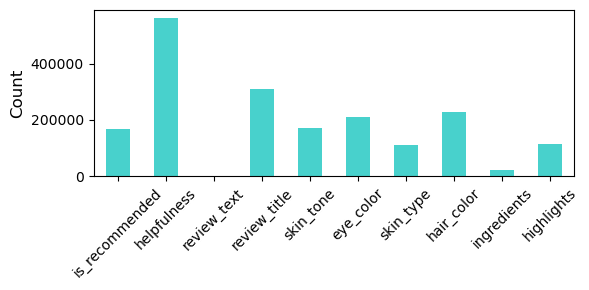

In [15]:
plt.style.use("seaborn-v0_8-deep")

# visualize missing value
# Create a bar graph
missing_value.plot(kind='bar', figsize=(6, 3), color='mediumturquoise')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('full_data_missing_value.png', dpi=600)
plt.show()

In [16]:
# remove missing values 
full_df.dropna(subset=['ingredients', 'highlights'],
                 inplace = True)

In [17]:
print(" \nOur rating data has: ", full_df.shape[0], "rows and ", full_df.shape[1], "columns") 
print("Number of products:", full_df['product_id'].nunique(), "products")
print("Number of users:", full_df['author_id'].nunique(), 'users')

 
Our rating data has:  966018 rows and  25 columns
Number of products: 1868 products
Number of users: 449955 users


# 3. Remove users having too few ratings

We see that many users just have only one rating, meaning that those user might not add much information for our recommendation system (especially for the memory-based CF). Thus, at this step, we might consider remove some users having too few ratings to build memory-based CF as our dataset is too sparse. Generally, model-based CF will perform better with sparse data. However, we still want to try how the memmory-based CF perform.

In [18]:
# check the number of ratings per each person and see its distribution
grouped_full_df = full_df.groupby('author_id').size()
grouped_full_df.describe()

count    449955.000000
mean          2.146921
std           3.329855
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         263.000000
dtype: float64

<Figure size 600x300 with 0 Axes>

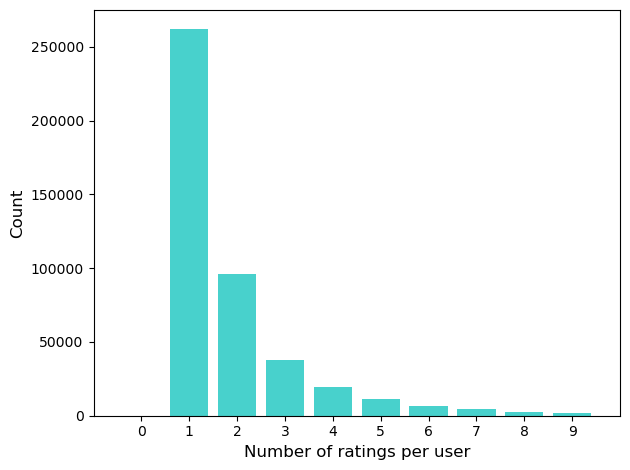

In [19]:
# Reference
# https://stackoverflow.com/questions/27083051/matplotlib-xticks-not-lining-up-with-histogram

# visualize frequency of numbers of ratings per each user
plot_rating_df = grouped_full_df[grouped_full_df < 10]  # filter users having less than 10 ratings
plt.style.use("seaborn-v0_8-deep")
plt.figure(figsize=(6,3))
counts = np.bincount(plot_rating_df)
fig, ax = plt.subplots()
ax.bar(range(10), counts, width=0.8, align='center', color='mediumturquoise')
ax.set(xticks=range(10), xlim=[-1, 10])
plt.ylabel('Count', fontsize=12)    
plt.xlabel('Number of ratings per user', fontsize=12)
plt.tight_layout()
#plt.savefig('no_rating_per_user.png', dpi=600)
plt.show()

In [20]:
# extract index of users having more than two rating
filtered_author_ids = grouped_full_df[grouped_full_df >= 3].index.tolist()

In [21]:
# Remove users having less or just two rating
full_df = full_df[full_df['author_id'].isin(filtered_author_ids)]

In [22]:
print(" \nOur rating data has: ", full_df.shape[0], "rows and ", full_df.shape[1], "columns") 
print("Number of products:", full_df['product_id'].nunique(), "products")
print("Number of users:", full_df['author_id'].nunique(), 'users')

 
Our rating data has:  512192 rows and  25 columns
Number of products: 1831 products
Number of users: 92155 users


# 4. Remove duplication

In [23]:
# sort ratings by submission time
full_df = full_df.sort_values('submission_time', ascending=True)
# remove rating by the same user for the same product but in different year. Keep only the lastest rating
full_df = full_df.drop_duplicates(['author_id','product_id'], keep='last') 

In [24]:
print(" \nOur rating data has: ", full_df.shape[0], "rows and ", full_df.shape[1], "columns") 
print("Number of products:", full_df['product_id'].nunique(), "products")
print("Number of users:", full_df['author_id'].nunique(), 'users')

 
Our rating data has:  508698 rows and  25 columns
Number of products: 1831 products
Number of users: 92155 users


# 5. Add new columns

## Number of rating per product

In [25]:
# group dataframe by product_id to calculate number of rating for each product 
grouped_df2 = full_df.groupby('product_id').size().reset_index(name='num_rating')
# add "number of rating" column 
full_df = pd.merge(full_df, grouped_df2, on='product_id')

## Niche thresholds

In [26]:
# subset dataframe and remove duplicated 'product_id'
niche_threshold_df = full_df[['product_id', 'num_rating']].drop_duplicates()
niche_threshold_df

,product_id,num_rating
0,P39274,618
618,P449599,618
1236,P481817,1000
2236,P122762,205
2441,P139000,548
...,...,...
508612,P505711,82
508694,P504464,1
508695,P503915,1
508696,P503892,1


In [27]:
thresholds = range(1, 3001)
niche_count_list = []   # to store number of niche product
niche_num_rating_list = []  # to store the total number of rating of niche product

# create a for loop to count number niche product (product having less than certain number of rating)
for threshold in thresholds:
    niche_threshold_df['niche_product'] = np.where(niche_threshold_df['num_rating'] <= threshold, 1, 0)
    niche_count = niche_threshold_df.groupby('niche_product').size()
    niche_count_list.append(niche_count[1])
    niche_num_rating = niche_threshold_df.loc[niche_threshold_df['niche_product'] == 1, 'num_rating'].sum()
    niche_num_rating_list.append(niche_num_rating)

# Create a DataFrame to store result
niche_count_df = pd.DataFrame({
    'threshold': thresholds,
    'niche_count': niche_count_list,
    'num_rating_count': niche_num_rating_list
})

In [28]:
# calculate the share of total rating for niche products
niche_count_df['share_total_rating'] = niche_count_df['num_rating_count'] / len(full_df)
niche_count_df

,threshold,niche_count,num_rating_count,share_total_rating
0,1,59,59,0.000116
1,2,96,133,0.000261
2,3,124,217,0.000427
3,4,159,357,0.000702
4,5,185,487,0.000957
...,...,...,...,...
2995,2996,1824,482565,0.948628
2996,2997,1824,482565,0.948628
2997,2998,1824,482565,0.948628
2998,2999,1824,482565,0.948628


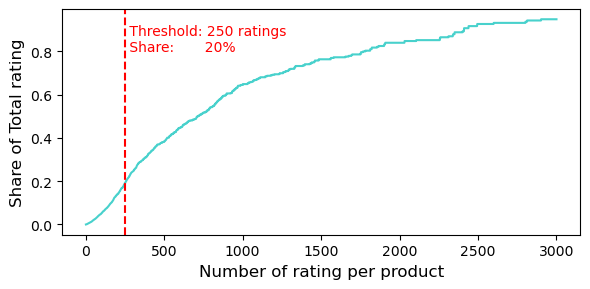

In [29]:
# visualize to determine the niche threshold
plt.style.use("seaborn-v0_8-deep")
plt.figure(figsize=(6,3))
plt.plot(niche_count_df['threshold'], niche_count_df['share_total_rating'],
         color='mediumturquoise')  # Plot the chart
plt.ylabel('Share of Total rating', fontsize=12)    
plt.xlabel('Number of rating per product', fontsize=12)
plt.axvline(x=250, color='r', linestyle='--')
plt.text(250, 0.8, ' Threshold: 250 ratings\n Share:       20%', color='r')
plt.tight_layout()
#plt.savefig('niche_thresholds.png', dpi=600)
plt.show()

## Final niche threshold

In [30]:
# create new column "niche" (dummy variable, 1 yes, 0 no)
full_df['niche_product'] = np.where(full_df['num_rating'] <= 250, 1, 0)
# remove duplicate of product
niche_counts = full_df[['product_id', 'niche_product']].drop_duplicates()
niche_counts

,product_id,niche_product
0,P39274,0
618,P449599,0
1236,P481817,0
2236,P122762,1
2441,P139000,0
...,...,...
508612,P505711,1
508694,P504464,1
508695,P503915,1
508696,P503892,1


In [31]:
# count the number of product per each type of "niche_product" variable
niche_counts = niche_counts.groupby('niche_product').size()
niche_counts

niche_product
0     575
1    1256
dtype: int64

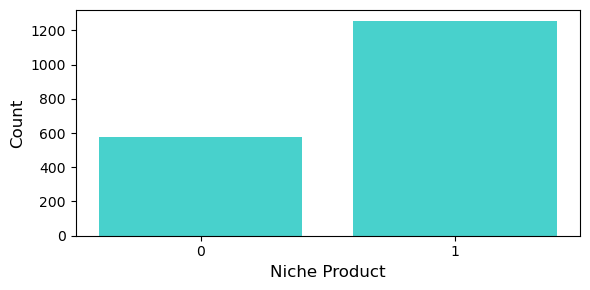

In [32]:
# plot
fig = plt.figure(figsize = (6, 3))
plt.bar(x=niche_counts.index, height=niche_counts.values,color='mediumturquoise')
plt.xlabel('Niche Product',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(niche_counts.index)
plt.tight_layout()
#plt.savefig('no_niche_product.png', dpi=600)
plt.show()

In [33]:
print(" \nOur rating data has: ", full_df.shape[0], "rows and ", full_df.shape[1], "columns") 
print("Number of products:", full_df['product_id'].nunique(), "products")
print("Number of users:", full_df['author_id'].nunique(), 'users')

 
Our rating data has:  508698 rows and  27 columns
Number of products: 1831 products
Number of users: 92155 users


# 6. Save file

In [34]:
#full_df.to_csv(path_or_buf='data/full_data_cleaned.csv', index=False)